In [1]:
#Dependecies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import requests
from os import getcwd


In [2]:
#data covid19 death

url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
df_covid19_death= pd.read_csv(url, error_bad_lines=False)
df_covid19_death.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
261,NaN,Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,0,...,13,13,13,13,14,14,14,14,14,14
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,338,345,348,351,361,364,365,417,424,429
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
264,NaN,Tajikistan,38.861000,71.276100,0,0,0,0,0,0,...,53,53,53,54,54,55,55,55,55,56
265,NaN,Lesotho,-29.610000,28.233600,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,3,3


In [3]:
#columns name
list(df_covid19_death.columns)

['Province/State',
 'Country/Region',
 'Lat',
 'Long',
 '1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 '4/4/20',
 '4/5/20',
 '4/6/20',
 '4/7/20',
 '4/8/20',
 '4/9/20',
 '4/10/20',
 '4/11/20',


In [4]:
# droping columns
df_covid19_death=df_covid19_death.drop(['Lat', 'Long'], axis=1)


In [5]:
# transpose dataFrame and replace columns
df_covid19_death=df_covid19_death.T
columns_to_change={}
columns_province=df_covid19_death[0:1].values[0]
columns_country=df_covid19_death[1:2].values[0]
for c in df_covid19_death[0:1].columns.values:
    if str(columns_province[int(c)])!='nan':
           columns_to_change[c]=str(columns_country[int(c)])+'-' + str(columns_province[int(c)])
    else:
          columns_to_change[c]=str(columns_country[int(c)])


df_covid19_death=df_covid19_death.rename(columns=columns_to_change)
df_covid19_death=df_covid19_death.drop(['Province/State', 'Country/Region'])
df_covid19_death.index=pd.to_datetime(df_covid19_death.index)

df_covid19_death.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia-Australian Capital Territory,Australia-New South Wales,...,Malawi,United Kingdom-Falkland Islands (Malvinas),France-Saint Pierre and Miquelon,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#data covid19 test
url_test="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df_covid19_test= pd.read_csv(url_test, error_bad_lines=False)


df_covid19_test.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,858,861
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,346,346,386,386,396,458,462,506,525,541


In [7]:
# droping columns
df_covid19_test=df_covid19_test.drop(['Lat', 'Long'], axis=1)

In [8]:
# transpose dataFrame and replace columns
df_covid19_test=df_covid19_test.T
columns_to_replace={}
c_province=df_covid19_test[0:1].values[0]
c_countries=df_covid19_test[1:2].values[0]
for c in df_covid19_test[0:1].columns.values:
    if str(c_province[int(c)])!='nan':
           columns_to_replace[c]=str(c_countries[int(c)])+'-' + str(c_province[int(c)])
    else:
           columns_to_replace[c]=str(c_countries[int(c)])
# columns_to_replace

df_covid19_test=df_covid19_test.rename(columns=columns_to_replace)
df_covid19_test=df_covid19_test.drop(['Province/State', 'Country/Region'])
df_covid19_test.index=pd.to_datetime(df_covid19_test.index)

df_covid19_test.head()


,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia-Australian Capital Territory,Australia-New South Wales,...,Malawi,United Kingdom-Falkland Islands (Malvinas),France-Saint Pierre and Miquelon,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#data covid19 recovered
url_recovered="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
df_covid19_recovered= pd.read_csv(url_recovered, error_bad_lines=False)
df_covid19_recovered.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
248,NaN,Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,0,...,268,269,279,283,283,284,284,286,286,286
249,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,552,575,591,595,619,630,642,659,675,685
250,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,266,266,266,272,272,272,296,296,296,302
251,NaN,Tajikistan,38.861000,71.276100,0,0,0,0,0,0,...,4858,4914,4965,5011,5067,5115,5176,5228,5278,5332
252,NaN,Lesotho,-29.610000,28.233600,0,0,0,0,0,0,...,11,11,11,11,20,26,26,32,33,48


In [10]:
# droping columns
df_covid19_recovered=df_covid19_recovered.drop(['Lat', 'Long'], axis=1)

In [11]:
# transpose dataFrame and replace columns
df_covid19_recovered=df_covid19_recovered.T
columns_to_change={}
c_province=df_covid19_recovered[0:1].values[0]
c_country=df_covid19_recovered[1:2].values[0]
for c in df_covid19_recovered[0:1].columns.values:
    if str(c_province[int(c)])!='nan':
           columns_to_replace[c]=str(c_countries[int(c)])+'-' + str(c_province[int(c)])
    else:
           columns_to_replace[c]=str(c_countries[int(c)])
# columns_to_replace

df_covid19_recovered=df_covid19_recovered.rename(columns=columns_to_replace)
df_covid19_recovered=df_covid19_recovered.drop(['Province/State', 'Country/Region'])
df_covid19_recovered.index=pd.to_datetime(df_covid19_recovered.index)

df_covid19_test.head()


,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia-Australian Capital Territory,Australia-New South Wales,...,Malawi,United Kingdom-Falkland Islands (Malvinas),France-Saint Pierre and Miquelon,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Population Dataframe

url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'
# The table we're interested in is the first one read in from the webpage.
df = pd.read_html(url)[0]

df.head()


,Rank,Country (or dependent territory),Population,% of worldpopulation,Date,Source
0,1,China[b],1403540240,NaN,15 Jul 2020,National population clock[3]
1,2,India[c],1364723944,NaN,15 Jul 2020,National population clock[4]
2,3,United States[d],329957441,NaN,15 Jul 2020,National population clock[5]
3,4,Indonesia,269603400,NaN,1 Jul 2020,National annual projection[6]
4,5,Pakistan[e],220892331,NaN,1 Jul 2020,UN Projection[2]


In [13]:
# Rename the relevant column to something more manageable.
df.rename(columns={'Country (or dependent territory)': 'Country'}, inplace=True)
# Get rid of the footnote indicators, "[a]", "[b]", etc.
df['Country'] = df['Country'].str.replace('\[\w\]', '')
df.head()


,Rank,Country,Population,% of worldpopulation,Date,Source
0,1,China,1403540240,NaN,15 Jul 2020,National population clock[3]
1,2,India,1364723944,NaN,15 Jul 2020,National population clock[4]
2,3,United States,329957441,NaN,15 Jul 2020,National population clock[5]
3,4,Indonesia,269603400,NaN,1 Jul 2020,National annual projection[6]
4,5,Pakistan,220892331,NaN,1 Jul 2020,UN Projection[2]


In [14]:
# Set the 'Country' column to be the index.
df.index = df['Country']
df['date']=pd.to_datetime(df.Date)
df.drop(columns=['Rank','% of worldpopulation','Source','Date'],inplace=True)
df.head()


,Country,Population,date
Country,,,
China,China,1403540240,2020-07-15
India,India,1364723944,2020-07-15
United States,United States,329957441,2020-07-15
Indonesia,Indonesia,269603400,2020-07-01
Pakistan,Pakistan,220892331,2020-07-01


In [15]:
#select data from this year

populationBycountry=df[df['date']>'2020-1-1']
populationBycountry.head()


,Country,Population,date
Country,,,
China,China,1403540240,2020-07-15
India,India,1364723944,2020-07-15
United States,United States,329957441,2020-07-15
Indonesia,Indonesia,269603400,2020-07-01
Pakistan,Pakistan,220892331,2020-07-01


In [16]:
# creading dataframe with 1 million 
PopulationByCountry_m=(populationBycountry[['Population']]/1000000).to_dict()['Population']

In [17]:
# rename columns 
PopulationByCountry_m['US']=PopulationByCountry_m['United States']
PopulationByCountry_m

{'China': 1403.54024,
 'India': 1364.723944,
 'United States': 329.957441,
 'Indonesia': 269.6034,
 'Pakistan': 220.892331,
 'Brazil': 211.795665,
 'Nigeria': 206.139587,
 'Bangladesh': 168.957024,
 'Mexico': 127.792286,
 'Japan': 125.93,
 'Philippines': 108.895083,
 'Egypt': 100.620458,
 'DR Congo': 89.561404,
 'Iran': 83.614796,
 'France': 67.081,
 'Thailand': 66.528905,
 'South Africa': 59.62235,
 'South Korea': 51.780579,
 'Colombia': 50.372424,
 'Argentina': 45.376763,
 'Sudan': 42.66718,
 'Ukraine': 41.806221,
 'Uganda': 41.5903,
 'Iraq': 40.1502,
 'Poland': 38.379,
 'Canada': 38.100742,
 'Morocco': 35.95699,
 'Uzbekistan': 34.297085,
 'Afghanistan': 32.890171,
 'Malaysia': 32.84176,
 'Nepal': 29.996478,
 'Yemen': 29.825968,
 'Venezuela': 28.435943,
 'Cameroon': 26.545864,
 'Ivory Coast': 26.453542,
 'Australia': 25.772309,
 'Taiwan': 23.586562,
 'Niger': 23.196002,
 'Mali': 20.250833,
 'Chile': 19.45831,
 'Malawi': 19.129952,
 'Kazakhstan': 18.738536,
 'Zambia': 17.885422,
 'Ecu

In [18]:
# new data frame to model
Country=['US','Brazil','Colombia','Venezuela']
covid19_death_bycountry=df_covid19_death[Country].copy()
covid19_death_bycountry.tail()


,US,Brazil,Colombia,Venezuela
2020-07-10,134092,70398,4985,83
2020-07-11,134777,71469,5202,85
2020-07-12,135205,72100,5426,89
2020-07-13,135566,72833,5634,93
2020-07-14,136466,74133,5787,96


In [19]:
covid19_test_bycountry=df_covid19_test[Country].copy()
covid19_test_bycountry.tail()


,US,Brazil,Colombia,Venezuela
2020-07-10,3184573,1800827,133973,8803
2020-07-11,3245925,1839850,140776,9178
2020-07-12,3304942,1864681,145362,9465
2020-07-13,3364157,1884967,150445,9707
2020-07-14,3431574,1926824,154277,10010


In [20]:
covid19_recovered_bycountry=df_covid19_recovered[Country].copy()
covid19_recovered_bycountry.tail()


,US,Brazil,Colombia,Venezuela
2020-07-10,983185,3037,8208,2671
2020-07-11,995576,3078,8227,2671
2020-07-12,1006326,3115,8247,2671
2020-07-13,1031939,3179,8373,2671
2020-07-14,1049098,3179,8441,2671


In [21]:
# creading a new columns
for c in covid19_death_bycountry.columns:
    print(PopulationByCountry_m[c])
    covid19_death_bycountry[c+'_case1M']=covid19_death_bycountry[c]/PopulationByCountry_m[c]


329.957441
211.795665
50.372424
28.435943


In [22]:
for c in covid19_test_bycountry.columns:
    print(PopulationByCountry_m[c])
    covid19_test_bycountry[c+'_case1M']=covid19_test_bycountry[c]/PopulationByCountry_m[c]

329.957441
211.795665
50.372424
28.435943


In [23]:
for c in covid19_recovered_bycountry.columns:
    print(PopulationByCountry_m[c])
    covid19_recovered_bycountry[c+'_case1M']=covid19_recovered_bycountry[c]/PopulationByCountry_m[c]


329.957441
211.795665
50.372424
28.435943


In [24]:
#creading a new columns 
covid19_death_bycountry_M=covid19_death_bycountry.copy()
for c in covid19_death_bycountry.columns:
     covid19_death_bycountry_M[c+ '_pchg']=covid19_death_bycountry_M[c].pct_change(1)
covid19_death_bycountry_M.dropna(inplace=True)

covid19_death_bycountry_M.head()


,US,Brazil,Colombia,Venezuela,US_case1M,Brazil_case1M,Colombia_case1M,Venezuela_case1M,US_pchg,Brazil_pchg,Colombia_pchg,Venezuela_pchg,US_case1M_pchg,Brazil_case1M_pchg,Colombia_case1M_pchg,Venezuela_case1M_pchg
2020-03-27,2300,92,6,1,6.9706,0.434381,0.119113,0.0351668,0.317297,0.194805,0.000000,inf,0.317297,0.194805,0.000000,inf
2020-03-28,2934,111,6,2,8.89206,0.52409,0.119113,0.0703335,0.275652,0.206522,0.000000,1.0,0.275652,0.206522,0.000000,1.0
2020-03-29,3561,136,10,2,10.7923,0.642128,0.198521,0.0703335,0.213701,0.225225,0.666667,0.0,0.213701,0.225225,0.666667,0.0
2020-03-30,4381,159,12,3,13.2775,0.750724,0.238226,0.1055,0.230272,0.169118,0.200000,0.5,0.230272,0.169118,0.200000,0.5
2020-03-31,5605,201,16,3,16.987,0.949028,0.317634,0.1055,0.279388,0.264151,0.333333,0.0,0.279388,0.264151,0.333333,0.0


In [25]:
covid19_test_bycountry_M=covid19_test_bycountry.copy()
for c in covid19_test_bycountry.columns:
     covid19_test_bycountry_M[c+ '_pchg']=covid19_test_bycountry_M[c].pct_change(1)
covid19_test_bycountry_M.dropna(inplace=True)

covid19_test_bycountry_M.head()

,US,Brazil,Colombia,Venezuela,US_case1M,Brazil_case1M,Colombia_case1M,Venezuela_case1M,US_pchg,Brazil_pchg,Colombia_pchg,Venezuela_pchg,US_case1M_pchg,Brazil_case1M_pchg,Colombia_case1M_pchg,Venezuela_case1M_pchg
2020-03-14,2870,151,22,2,8.69809,0.712951,0.436747,0.0703335,0.330552,0.000000,0.692308,inf,0.330552,0.000000,0.692308,inf
2020-03-15,2968,162,34,10,8.9951,0.764888,0.674972,0.351668,0.034146,0.072848,0.545455,4.000000,0.034146,0.072848,0.545455,4.000000
2020-03-16,4360,200,54,17,13.2138,0.944306,1.07202,0.597835,0.469003,0.234568,0.588235,0.700000,0.469003,0.234568,0.588235,0.700000
2020-03-17,6141,321,65,33,18.6115,1.51561,1.29039,1.1605,0.408486,0.605000,0.203704,0.941176,0.408486,0.605000,0.203704,0.941176
2020-03-18,8917,372,93,36,27.0247,1.75641,1.84625,1.266,0.452044,0.158879,0.430769,0.090909,0.452044,0.158879,0.430769,0.090909


In [26]:
covid19_recovered_bycountry_M=covid19_recovered_bycountry.copy()
for c in covid19_recovered_bycountry.columns:
     covid19_recovered_bycountry_M[c+ '_pchg']=covid19_recovered_bycountry_M[c].pct_change(1)
covid19_recovered_bycountry_M.dropna(inplace=True)

covid19_recovered_bycountry_M.head()


,US,Brazil,Colombia,Venezuela,US_case1M,Brazil_case1M,Colombia_case1M,Venezuela_case1M,US_pchg,Brazil_pchg,Colombia_pchg,Venezuela_pchg,US_case1M_pchg,Brazil_case1M_pchg,Colombia_case1M_pchg,Venezuela_case1M_pchg
2020-03-22,178,2,6,15,0.539464,0.00944306,0.119113,0.527501,0.011364,0.0,0.000000,inf,0.011364,0.0,0.000000,inf
2020-03-23,178,2,6,15,0.539464,0.00944306,0.119113,0.527501,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
2020-03-24,348,2,10,15,1.05468,0.00944306,0.198521,0.527501,0.955056,0.0,0.666667,0.0,0.955056,0.0,0.666667,0.0
2020-03-25,361,2,10,15,1.09408,0.00944306,0.198521,0.527501,0.037356,0.0,0.000000,0.0,0.037356,0.0,0.000000,0.0
2020-03-26,681,2,10,15,2.0639,0.00944306,0.198521,0.527501,0.886427,0.0,0.000000,0.0,0.886427,0.0,0.000000,0.0


In [27]:
#remane columns

Case=['US_case1M','Brazil_case1M','Colombia_case1M','Venezuela_case1M']
covid19_death_cases1M=covid19_death_bycountry_M[Case].copy()
covid19_death_cases1M.rename(columns={'US_case1M': 'US_Death_Case1M'}, inplace=True)
covid19_death_cases1M.rename(columns={'Brazil_case1M': 'Brazil_Death_Case1M'}, inplace=True)
covid19_death_cases1M.rename(columns={'Colombia_case1M': 'Colombia_Death_Case1M'}, inplace=True)
covid19_death_cases1M.rename(columns={'Venezuela_case1M': 'Venezuela_Death_Case1M'}, inplace=True)
covid19_death_cases1M.tail()


,US_Death_Case1M,Brazil_Death_Case1M,Colombia_Death_Case1M,Venezuela_Death_Case1M
2020-07-10,406.392,332.386,98.9629,2.91884
2020-07-11,408.468,337.443,103.271,2.98917
2020-07-12,409.765,340.422,107.718,3.12984
2020-07-13,410.859,343.883,111.847,3.27051
2020-07-14,413.587,350.021,114.884,3.37601


In [28]:
covid19_test_cases1M=covid19_test_bycountry_M[Case].copy()
covid19_test_cases1M.rename(columns={'US_case1M': 'US_Test_Case1M'}, inplace=True)
covid19_test_cases1M.rename(columns={'Brazil_case1M': 'Brazil_Test_Case1M'}, inplace=True)
covid19_test_cases1M.rename(columns={'Colombia_case1M': 'Colombia_Test_Case1M'}, inplace=True)
covid19_test_cases1M.rename(columns={'Venezuela_case1M': 'Venezuela_Test_Case1M'}, inplace=True)
covid19_test_cases1M.tail()


,US_Test_Case1M,Brazil_Test_Case1M,Colombia_Test_Case1M,Venezuela_Test_Case1M
2020-07-10,9651.47,8502.66,2659.65,309.573
2020-07-11,9837.41,8686.91,2794.7,322.761
2020-07-12,10016.3,8804.15,2885.75,332.853
2020-07-13,10195.7,8899.93,2986.65,341.364
2020-07-14,10400.1,9097.56,3062.73,352.019


In [29]:
covid19_recovered_cases1M=covid19_recovered_bycountry_M[Case].copy()
covid19_recovered_cases1M.rename(columns={'US_case1M': 'US_Recovered_Case1M'}, inplace=True)
covid19_recovered_cases1M.rename(columns={'Brazil_case1M': 'Brazil_Recovered_Case1M'}, inplace=True)
covid19_recovered_cases1M.rename(columns={'Colombia_case1M': 'Colombia_Recovered_Case1M'}, inplace=True)
covid19_recovered_cases1M.rename(columns={'Venezuela_case1M': 'Venezuela_Recovered_Case1M'}, inplace=True)
covid19_recovered_cases1M.tail()

,US_Recovered_Case1M,Brazil_Recovered_Case1M,Colombia_Recovered_Case1M,Venezuela_Recovered_Case1M
2020-07-10,2979.73,14.3393,162.946,93.9304
2020-07-11,3017.29,14.5329,163.323,93.9304
2020-07-12,3049.87,14.7076,163.721,93.9304
2020-07-13,3127.49,15.0098,166.222,93.9304
2020-07-14,3179.49,15.0098,167.572,93.9304


In [30]:
#creading Dataframe to model

covid19_model_Df=pd.concat([covid19_test_cases1M, covid19_death_cases1M,covid19_recovered_cases1M], axis=1)
covid19_model_Df = covid19_model_Df.apply (pd.to_numeric, errors='coerce')
covid19_model_Df = covid19_model_Df.dropna()
covid19_model_Df.head()

,US_Test_Case1M,Brazil_Test_Case1M,Colombia_Test_Case1M,Venezuela_Test_Case1M,US_Death_Case1M,Brazil_Death_Case1M,Colombia_Death_Case1M,Venezuela_Death_Case1M,US_Recovered_Case1M,Brazil_Recovered_Case1M,Colombia_Recovered_Case1M,Venezuela_Recovered_Case1M
2020-03-27,309.967248,16.133475,10.700299,3.762843,6.970596,0.434381,0.119113,0.035167,2.633673,0.023608,0.218373,1.090170
2020-03-28,369.953772,18.432861,12.070096,4.184845,8.892056,0.524090,0.119113,0.070334,3.248904,0.023608,0.218373,1.371504
2020-03-29,427.949131,20.094840,13.936197,4.184845,10.792301,0.642128,0.198521,0.070334,8.076799,0.037772,0.218373,1.371504
2020-03-30,493.115111,21.619895,15.842001,4.747513,13.277470,0.750724,0.238226,0.105500,17.105236,0.080266,0.496303,1.371504
2020-03-31,571.964673,26.992998,17.986031,4.747513,16.987039,0.949028,0.317634,0.105500,21.287594,0.080266,0.893346,1.371504


In [31]:
# Machine learning Model 

#model 1:Country USA
features=['US_Test_Case1M','US_Recovered_Case1M','US_Death_Case1M']
X=covid19_model_Df[features[:-1]]
y=covid19_model_Df[features[-1:]]

In [32]:
#train and test data
X_train,X_test,y_train,y_test=X[0:int(len(X)*0.50)],X[int(len(X)*0.50):],y[0:int(len(X)*0.50)],y[int(len(X)*0.50):]

In [33]:
#applying lineal Regression model

from sklearn import linear_model
Model = linear_model.LinearRegression()
Model.fit(X_train,y_train)
Model.coef_

array([[0.06307478, 0.01694628]])

In [34]:
#prediction

death_y_pred = Model.predict(X_test)
death_y_pred

array([[296.17878116],
       [303.44971532],
       [308.19169783],
       [312.45263861],
       [316.72089475],
       [320.62563308],
       [324.4597041 ],
       [329.25670581],
       [334.27242137],
       [339.41859693],
       [344.71976861],
       [348.72912489],
       [353.01293108],
       [357.61852407],
       [361.9949948 ],
       [367.1611342 ],
       [371.97616652],
       [375.64902963],
       [379.6021644 ],
       [383.39258456],
       [387.81177679],
       [392.54753169],
       [397.75472873],
       [403.11355254],
       [407.17069571],
       [411.67453789],
       [416.57418663],
       [421.90626096],
       [427.57784885],
       [433.98590509],
       [440.79787663],
       [446.09196579],
       [452.85703829],
       [459.96126855],
       [467.08181046],
       [475.08405513],
       [484.10721557],
       [492.70721853],
       [500.46992121],
       [509.40817228],
       [518.94536021],
       [529.20867439],
       [542.28889256],
       [552

In [35]:
# reshape the array
y_test.values.ravel()

array([290.20712402, 294.05307456, 297.45048241, 299.29314429,
       300.84789026, 302.92391557, 307.49723265, 311.07951283,
       314.6133019 , 317.53489081, 319.3260309 , 321.66572658,
       324.79643337, 327.79682032, 330.85479045, 333.79456352,
       335.85543537, 337.22227831, 338.75277873, 341.60163098,
       344.38077728, 347.05081859, 349.54204897, 351.81506939,
       352.71821617, 353.90321748, 356.44596965, 358.72202076,
       360.85562926, 362.89225555, 364.74097882, 365.51380576,
       366.74426748, 369.28095827, 371.57519354, 378.91553414,
       380.74910394, 382.23111325, 382.95847979, 384.02225334,
       386.20738364, 388.24704062, 390.36246496, 392.29907835,
       393.04765974, 393.86897779, 394.8539533 , 398.4756325 ,
       400.96080149, 403.96118844, 406.39180494, 408.46783025,
       409.76496723, 410.85904773, 413.58667223])

In [36]:
# reshape the array
death_y_pred.ravel()
y_pred=death_y_pred.ravel

In [37]:
# Data frame to see the model preditions and test data
covid_model_df_test=pd.DataFrame({
    "y_test":y_test.values.ravel(),
    "y_pred":death_y_pred.ravel()
})
covid_model_df=covid_model_df_test
covid_model_df.head()

,y_test,y_pred
0,290.207124,296.178781
1,294.053075,303.449715
2,297.450482,308.191698
3,299.293144,312.452639
4,300.847890,316.720895


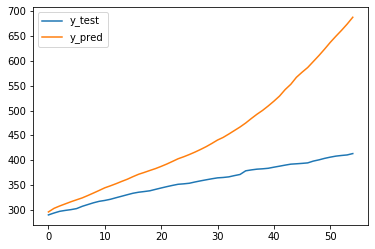

In [38]:
covid_model_df.plot()

In [39]:
# looking model  error 
covid_model_df['Error']=covid_model_df['y_pred']-covid_model_df['y_test']
covid_model_df['Error_Pctg']=covid_model_df['Error']/covid_model_df['y_test']
covid_model_df.head()

,y_test,y_pred,Error,Error_Pctg
0,290.207124,296.178781,5.971657,0.020577
1,294.053075,303.449715,9.396641,0.031956
2,297.450482,308.191698,10.741215,0.036111
3,299.293144,312.452639,13.159494,0.043969
4,300.847890,316.720895,15.873004,0.052761


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BB226D148>,
      dtype=object)

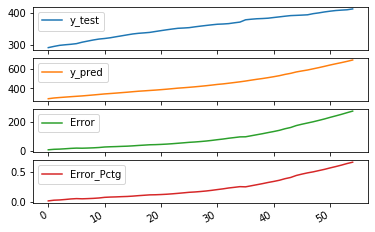

In [40]:
covid_model_df.plot(subplots=True)

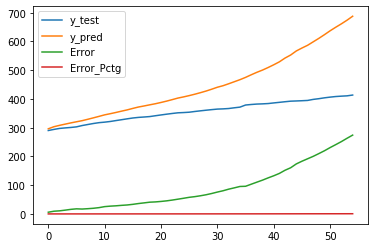

In [41]:
covid_model_df.plot(subplots=False)

In [42]:
# score model
print(f"Training Data Score: {Model.score(X_train, y_train)}")
print(f"Testing Data Score: {Model.score(X_test, y_test)}")

Training Data Score: 0.9982738456888518
Testing Data Score: -10.408055341196745


In [43]:
death_y_pred_train = Model.predict(X_train)

In [44]:
# Data frame to see the model preditions and train data
covid_model_df_t=pd.DataFrame({
    "y_train":y_train.values.ravel(),
    "y_pred":death_y_pred_train.ravel()
})
covid_model_df_t.head()

,y_train,y_pred
0,6.970596,-2.447602
1,8.892056,1.346461
2,10.792301,5.086321
3,13.277470,9.349649
4,16.987039,14.393943


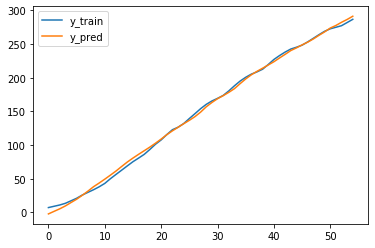

In [45]:
covid_model_df_t.plot()

In [46]:
# Machine learning Model 

#model 1:Country USA
features=['Brazil_Test_Case1M','Brazil_Recovered_Case1M','Brazil_Death_Case1M']
X=covid19_model_Df[features[:-1]]
y=covid19_model_Df[features[-1:]]

In [47]:
#train and test data
X_train,X_test,y_train,y_test=X[0:int(len(X)*0.50)],X[int(len(X)*0.50):],y[0:int(len(X)*0.50)],y[int(len(X)*0.50):]

In [48]:
#applying lineal Regression model

from sklearn import linear_model
Model = linear_model.LinearRegression()
Model.fit(X_train,y_train)
Model.coef_

array([[0.0594466 , 1.47040033]])

In [49]:
#prediction

death_y_pred = Model.predict(X_test)
#death_y_pred

In [50]:
# reshape the array
y_test.values.ravel()

array([ 94.65255108,  99.37880457, 103.9350829 , 107.01824327,
       110.82851955, 115.73419125, 120.86177496, 126.3198659 ,
       131.62686781, 136.14065236, 138.4069877 , 141.3485021 ,
       147.30707543, 153.67642204, 160.6312386 , 165.37637822,
       169.6446431 , 172.12344738, 175.32936758, 181.33515622,
       187.35038793, 193.20036602, 197.49223857, 201.70384507,
       204.59342263, 207.55382316, 213.60682713, 219.59845118,
       225.44370774, 231.13787527, 235.96328093, 238.86702308,
       242.07766481, 248.56504971, 254.16006508, 259.54733304,
       264.22164967, 269.45782861, 272.06411425, 275.33141436,
       281.37497526, 286.27592543, 292.18728344, 298.27805966,
       303.42925102, 306.27161326, 309.19896307, 315.11976414,
       320.89419772, 326.6544667 , 332.38640649, 337.44316721,
       340.42245388, 343.8833368 , 350.02132834])

In [51]:
# reshape the array
death_y_pred.ravel()
y_pred=death_y_pred.ravel

In [52]:
# Data frame to see the model preditions and test data
covid_model_df_test=pd.DataFrame({
    "y_test":y_test.values.ravel(),
    "y_pred":death_y_pred.ravel()
})
covid_model_df_test.head()

,y_test,y_pred
0,94.652551,96.899682
1,99.378805,102.863614
2,103.935083,107.830305
3,107.018243,112.393649
4,110.828520,115.785026


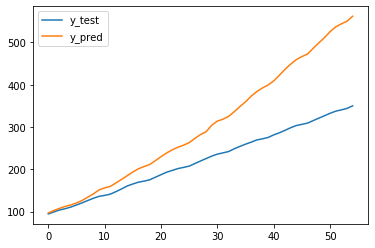

In [53]:
covid_model_df_test.plot()

In [54]:
# looking model  error 
covid_model_df['Error']=covid_model_df['y_pred']-covid_model_df['y_test']
covid_model_df['Error_Pctg']=covid_model_df['Error']/covid_model_df['y_test']
covid_model_df.head()

,y_test,y_pred,Error,Error_Pctg
0,290.207124,296.178781,5.971657,0.020577
1,294.053075,303.449715,9.396641,0.031956
2,297.450482,308.191698,10.741215,0.036111
3,299.293144,312.452639,13.159494,0.043969
4,300.847890,316.720895,15.873004,0.052761


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BB266C2C8>,
      dtype=object)

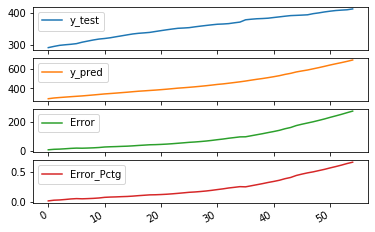

In [55]:
covid_model_df.plot(subplots=True)

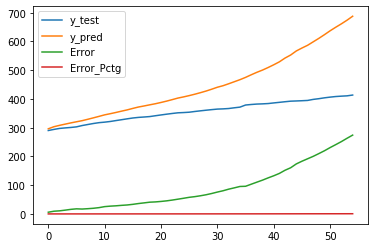

In [56]:
covid_model_df.plot(subplots=False)

In [57]:
# score model
print(f"Training Data Score: {Model.score(X_train, y_train)}")
print(f"Testing Data Score: {Model.score(X_test, y_test)}")

Training Data Score: 0.9992832250374565
Testing Data Score: -0.8982582244054717


In [58]:
# Machine learning Model 

#model 1:Country USA
features=['Colombia_Test_Case1M','Colombia_Recovered_Case1M','Colombia_Death_Case1M']
X=covid19_model_Df[features[:-1]]
y=covid19_model_Df[features[-1:]]

In [59]:
#train and test data
X_train,X_test,y_train,y_test=X[0:int(len(X)*0.50)],X[int(len(X)*0.50):],y[0:int(len(X)*0.50)],y[int(len(X)*0.50):]

In [60]:
#applying lineal Regression model

from sklearn import linear_model
Model = linear_model.LinearRegression()
Model.fit(X_train,y_train)
Model.coef_

array([[0.01794904, 0.0524516 ]])

In [61]:
#prediction

death_y_pred = Model.predict(X_test)
#death_y_pred

In [62]:
# reshape the array
y_test.values.ravel()

array([ 12.94358993,  13.53915388,  13.99575291,  14.43249981,
        14.88909885,  15.40525427,  15.94126183,  16.53682578,
        16.97357268,  17.68824943,  18.18455272,  19.11760292,
        20.13006164,  20.98370331,  21.81749284,  23.90196668,
        23.90196668,  25.11294672,  27.25697695,  27.25697695,
        28.56721765,  29.87745835,  31.00902986,  32.2200099 ,
        33.15306009,  35.89265428,  35.89265428,  37.46097269,
        38.81091766,  40.61746165,  42.64237909,  46.71206611,
        48.16127173,  50.10678065,  50.10678065,  51.83391611,
        55.30803918,  58.48438026,  64.63854112,  64.63854112,
        67.02079693,  69.2442357 ,  72.46028105,  76.45055954,
        79.42837931,  82.94220663,  85.46342737,  88.38169074,
        91.43891904,  95.11156342,  98.96287699, 103.27078959,
       107.71766711, 111.84691052, 114.88428669])

In [63]:
# reshape the array
death_y_pred.ravel()
y_pred=death_y_pred.ravel

In [64]:
# Data frame to see the model preditions and test data
covid_model_df_test=pd.DataFrame({
    "y_test":y_test.values.ravel(),
    "y_pred":death_y_pred.ravel()
})
covid_model_df_test.head()

,y_test,y_pred
0,12.943590,12.977529
1,13.539154,13.366033
2,13.995753,13.758535
3,14.432500,14.149553
4,14.889099,14.545045


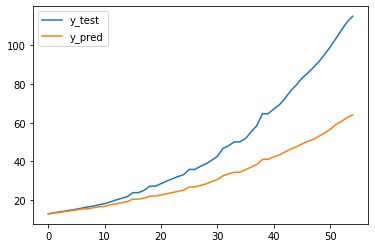

In [65]:
covid_model_df_test.plot()

In [66]:
# looking model  error 
covid_model_df['Error']=covid_model_df['y_pred']-covid_model_df['y_test']
covid_model_df['Error_Pctg']=covid_model_df['Error']/covid_model_df['y_test']
covid_model_df.head()

,y_test,y_pred,Error,Error_Pctg
0,290.207124,296.178781,5.971657,0.020577
1,294.053075,303.449715,9.396641,0.031956
2,297.450482,308.191698,10.741215,0.036111
3,299.293144,312.452639,13.159494,0.043969
4,300.847890,316.720895,15.873004,0.052761


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BB38B8C48>,
      dtype=object)

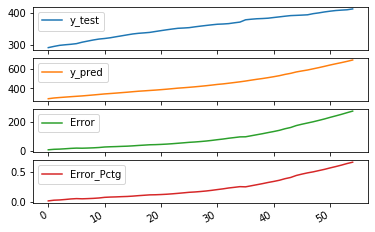

In [67]:
covid_model_df.plot(subplots=True)

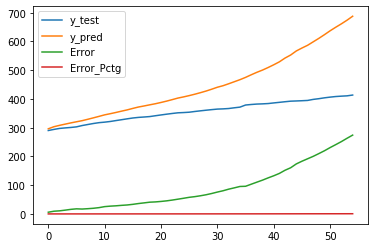

In [68]:
covid_model_df.plot(subplots=False)

In [69]:
# score model
print(f"Training Data Score: {Model.score(X_train, y_train)}")
print(f"Testing Data Score: {Model.score(X_test, y_test)}")

Training Data Score: 0.9956241719794489
Testing Data Score: 0.4761815230672962
